In [1]:
import pandas as pd
import numpy as np

In [2]:
cc_info = pd.read_csv('./data/cc_info.csv')
transactions = pd.read_csv('./data/transactions.csv')

In [3]:
cc_info.shape, transactions.shape

((984, 5), (294588, 5))

In [4]:
cc_info.columns

Index([u'credit_card', u'city', u'state', u'zipcode', u'credit_card_limit'], dtype='object')

In [5]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat'], dtype='object')

In [6]:
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [7]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [8]:
# Convert date to datetime type
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S')

In [9]:
transactions['date'].dt.year.value_counts()

2015    294588
Name: date, dtype: int64

In [10]:
transactions['date'].dt.month.value_counts()

8     99167
9     96026
10    95014
7      4381
Name: date, dtype: int64

In [11]:
transactions['date'].dt.day.value_counts()

1     10530
15    10426
10    10425
8     10338
29    10321
22    10291
9     10253
16    10196
7     10195
17    10182
2     10171
23    10117
3     10054
24     9989
14     9888
28     9887
11     9871
21     9830
18     9809
4      9673
25     9646
19     8877
5      8876
27     8804
26     8794
12     8789
6      8783
20     8751
13     8629
31     6445
30     5748
Name: date, dtype: int64

In [12]:
transactions['date'].dt.weekday.value_counts()

4    66386
3    53778
5    51940
2    36290
6    30139
1    29512
0    26543
Name: date, dtype: int64

In [13]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['weekday'] = transactions['date'].dt.weekday

In [14]:
cc_transactions = pd.merge(transactions, cc_info, how='inner', on='credit_card')

In [15]:
cc_transactions.shape

(294588, 13)

In [17]:
cc_transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,weekday,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,4,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,5,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,0,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,3,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,0,Houston,PA,15342,20000


In [18]:
total_by_card = transactions.groupby(['credit_card','month'])['transaction_dollar_amount'].sum()

In [19]:
total_by_card = total_by_card.reset_index()

In [20]:
total_by_card.head()

,credit_card,month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43


In [21]:
total_by_card.shape

(3797, 3)

### List of users (credit card number) that never went above credit card limit each month

In [22]:
total_not_limit = pd.merge(total_by_card, cc_info, how='inner', on='credit_card')

In [23]:
total_not_limit.shape

(3797, 7)

In [24]:
def f_over_limit(row):
    if row['credit_card_limit'] < row['transaction_dollar_amount']:
        return True
    else:
        return False

total_not_limit['overlimit'] = total_not_limit.apply(f_over_limit, axis=1)

In [25]:
total_not_limit.head()

,credit_card,month,transaction_dollar_amount,city,state,zipcode,credit_card_limit,overlimit
0,1003715054175576,7,162.56,Houston,PA,15342,20000,False
1,1003715054175576,8,8441.51,Houston,PA,15342,20000,False
2,1003715054175576,9,11281.56,Houston,PA,15342,20000,False
3,1003715054175576,10,8954.21,Houston,PA,15342,20000,False
4,1013870087888817,7,281.43,Washington,NH,3280,15000,False


In [26]:
total_not_limit.overlimit.value_counts()

False    3571
True      226
Name: overlimit, dtype: int64

In [27]:
overlimit_user = total_not_limit.groupby('credit_card')['overlimit'].any()

In [28]:
overlimit_user.shape, 

((984,),)

In [29]:
overlimit_user.head()

credit_card
1003715054175576    False
1013870087888817    False
1023820165155391    False
1073931538936472    False
1077622576192810    False
Name: overlimit, dtype: bool

In [30]:
overlimit_user.value_counts()

False    862
True     122
Name: overlimit, dtype: int64

In [31]:
overlimit_user[overlimit_user==True][:5]

credit_card
1106824181265726    True
1175962294549313    True
1190980117697422    True
1246716439259317    True
1280981422329509    True
Name: overlimit, dtype: bool

In [32]:
cc_info[cc_info.credit_card==1106824181265726]

,credit_card,city,state,zipcode,credit_card_limit
172,1106824181265726,Washington,NH,3280,6000


In [33]:
total_by_card[total_by_card.credit_card==1106824181265726]

,credit_card,month,transaction_dollar_amount
31,1106824181265726,7,90.87
32,1106824181265726,8,6734.92
33,1106824181265726,9,7419.42
34,1106824181265726,10,7483.05


In [34]:
never_over_limit_users = overlimit_user[overlimit_user==False].index

### Build function that for each day, return list of users that went above monthly credit card limit on that day

In [35]:
total_by_card.head()

,credit_card,month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43


### Fraud detection Unsupervised

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [37]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday'],
      dtype='object')

In [38]:
cc_transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday', u'city', u'state', u'zipcode',
       u'credit_card_limit'],
      dtype='object')

In [39]:
# Split training and test set (split by month)

In [40]:
transactions['hour'] = transactions.date.dt.hour

In [41]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday', u'hour'],
      dtype='object')

In [42]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1120a4990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1141c2050>]], dtype=object)

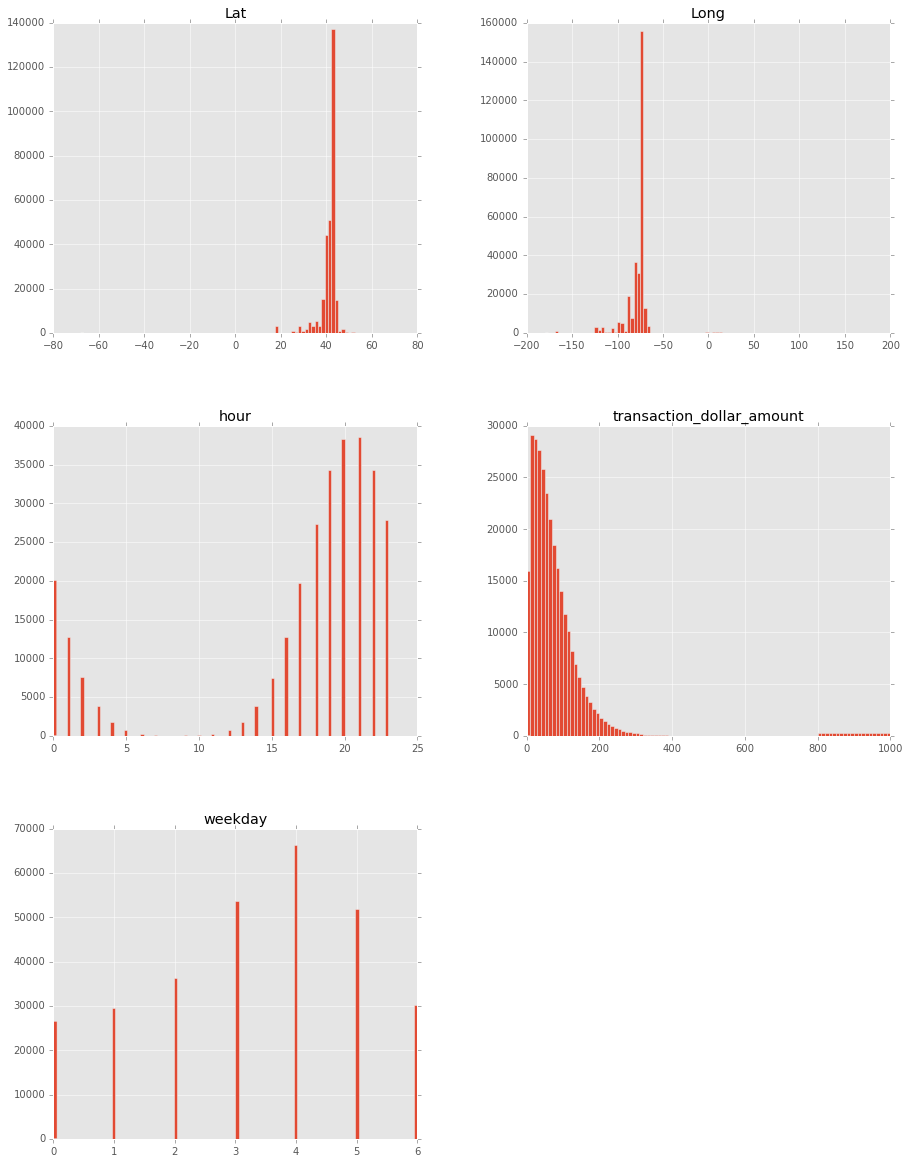

In [43]:
import matplotlib
matplotlib.style.use('ggplot')
features = ['transaction_dollar_amount','Long','Lat','weekday','hour']
transactions[features].hist(stacked=False, bins=100, figsize=(15,20), layout=(3,2))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ab17310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a76aed0>]], dtype=object)

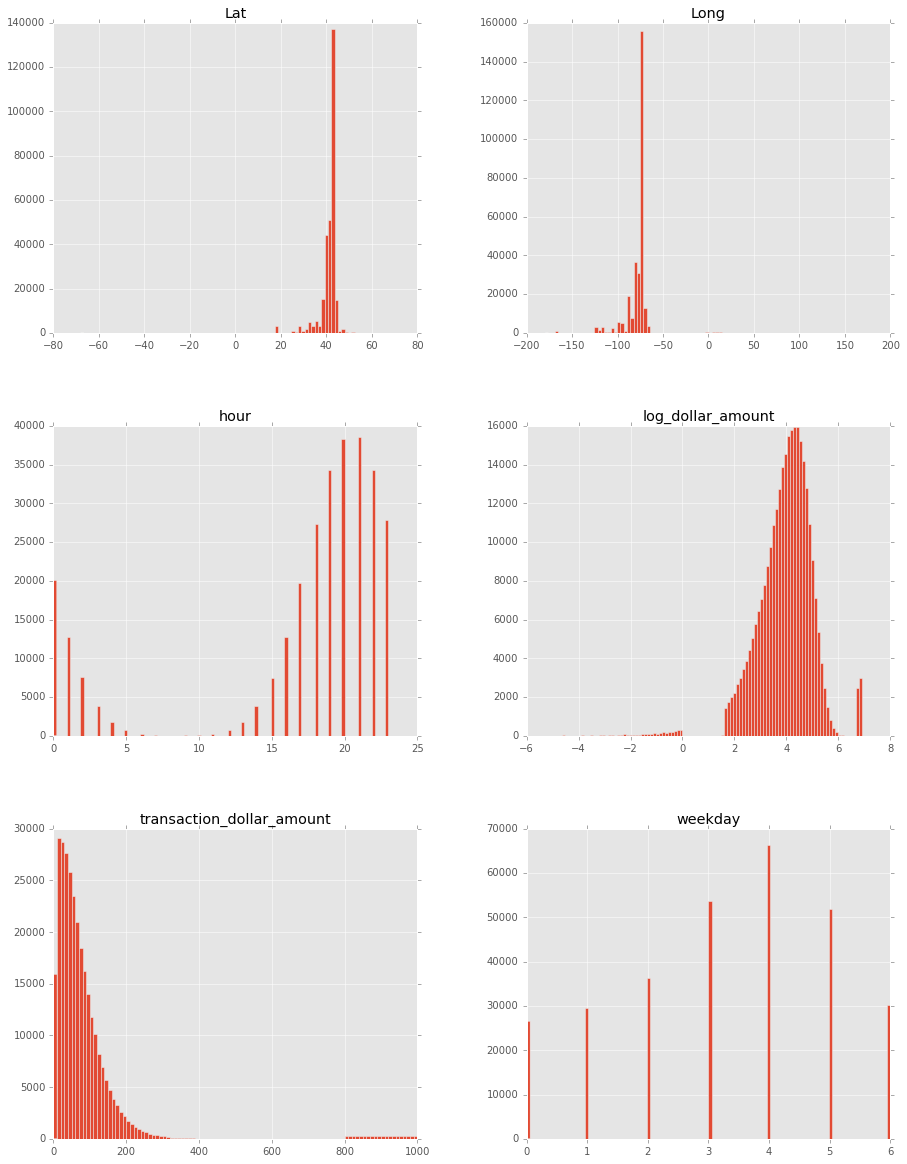

In [55]:
transactions['log_dollar_amount'] = np.log(transactions['transaction_dollar_amount'])
features.append('log_dollar_amount')
transactions[features].hist(stacked=False, bins=100, figsize=(15,20), layout=(3,2))

In [58]:
transactions[transactions['log_dollar_amount']<=0]

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,weekday,hour,log_dollar_amount
26,1003715054175576,2015-09-18 18:04:16,0.88,-80.132926,40.204183,2015,9,18,4,18,-0.127833
188,1003715054175576,2015-10-16 16:29:54,0.77,-80.178290,40.278221,2015,10,16,4,16,-0.261365
257,1003715054175576,2015-10-07 01:16:12,0.97,-80.196676,40.225513,2015,10,7,2,1,-0.030459
456,1013870087888817,2015-09-10 18:24:17,0.81,-72.077798,43.204047,2015,9,10,3,18,-0.210721
528,1013870087888817,2015-10-23 18:06:25,0.01,-72.137193,43.107800,2015,10,23,4,18,-4.605170
555,1013870087888817,2015-08-27 20:49:53,0.70,-72.072509,43.213273,2015,8,27,3,20,-0.356675
602,1023820165155391,2015-08-14 20:03:29,0.36,-73.211750,44.363776,2015,8,14,4,20,-1.021651
663,1023820165155391,2015-08-29 21:19:05,0.46,-73.230690,44.225010,2015,8,29,5,21,-0.776529
879,1023820165155391,2015-10-09 23:21:22,0.91,-73.189415,44.368470,2015,10,9,4,23,-0.094311
1044,1023820165155391,2015-09-21 20:29:01,0.92,-73.220427,44.297414,2015,9,21,0,20,-0.083382


In [60]:
transactions['log_Lat'] = np.log(transactions['Lat'])
transactions['log_Long'] = np.log(transactions['Long'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116523710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11212b710>]], dtype=object)

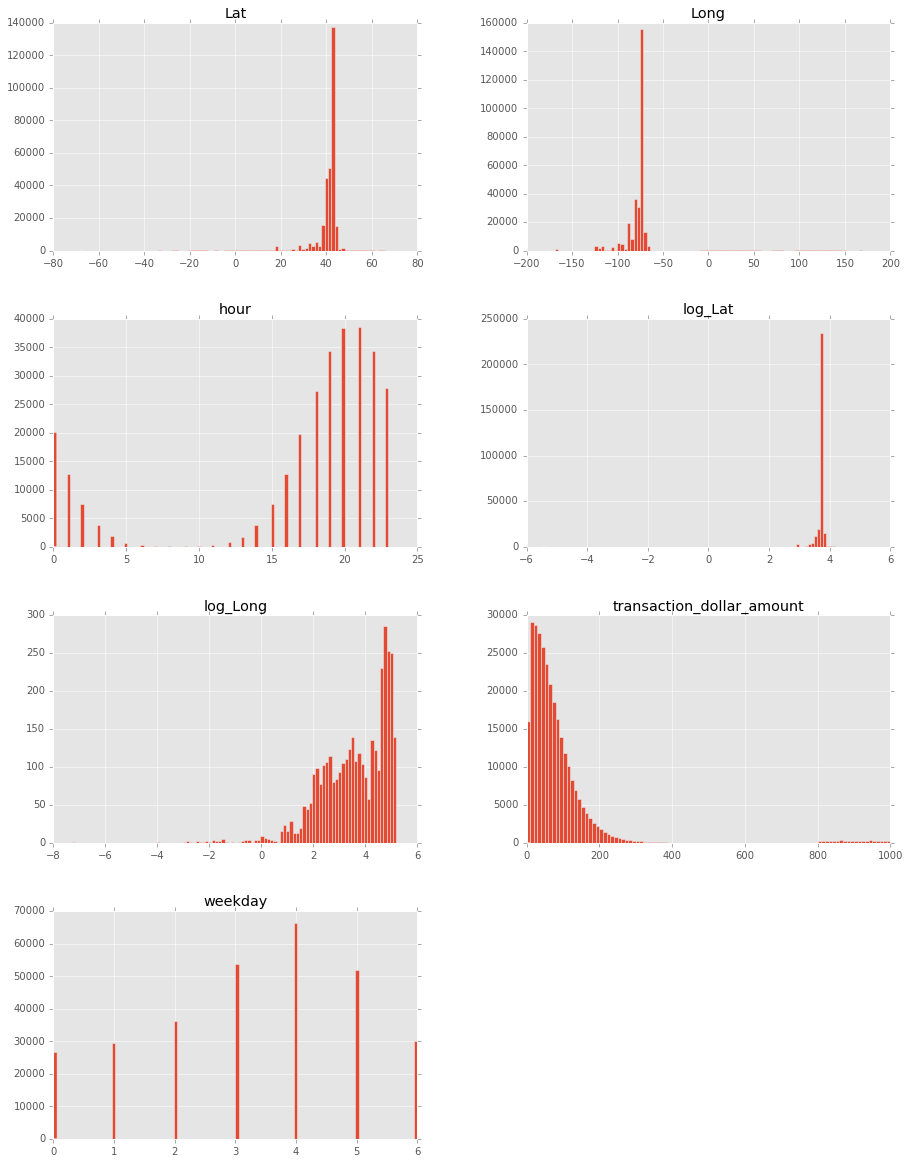

In [61]:
features = ['transaction_dollar_amount','Long','Lat','weekday','hour', 'log_Long','log_Lat']
transactions[features].hist(stacked=False, bins=100, figsize=(15,20), layout=(4,2))

In [63]:
mean_lat = np.mean(transactions['Lat'])
mean_long = np.mean(transactions['Long'])

In [66]:
transactions['distance_from_center_Lat'] = np.log(np.fabs(transactions['Lat'] - mean_lat))
transactions['distance_from_center_Long'] = np.log(np.fabs(transactions['Long'] - mean_long))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd40cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d539e50>]], dtype=object)

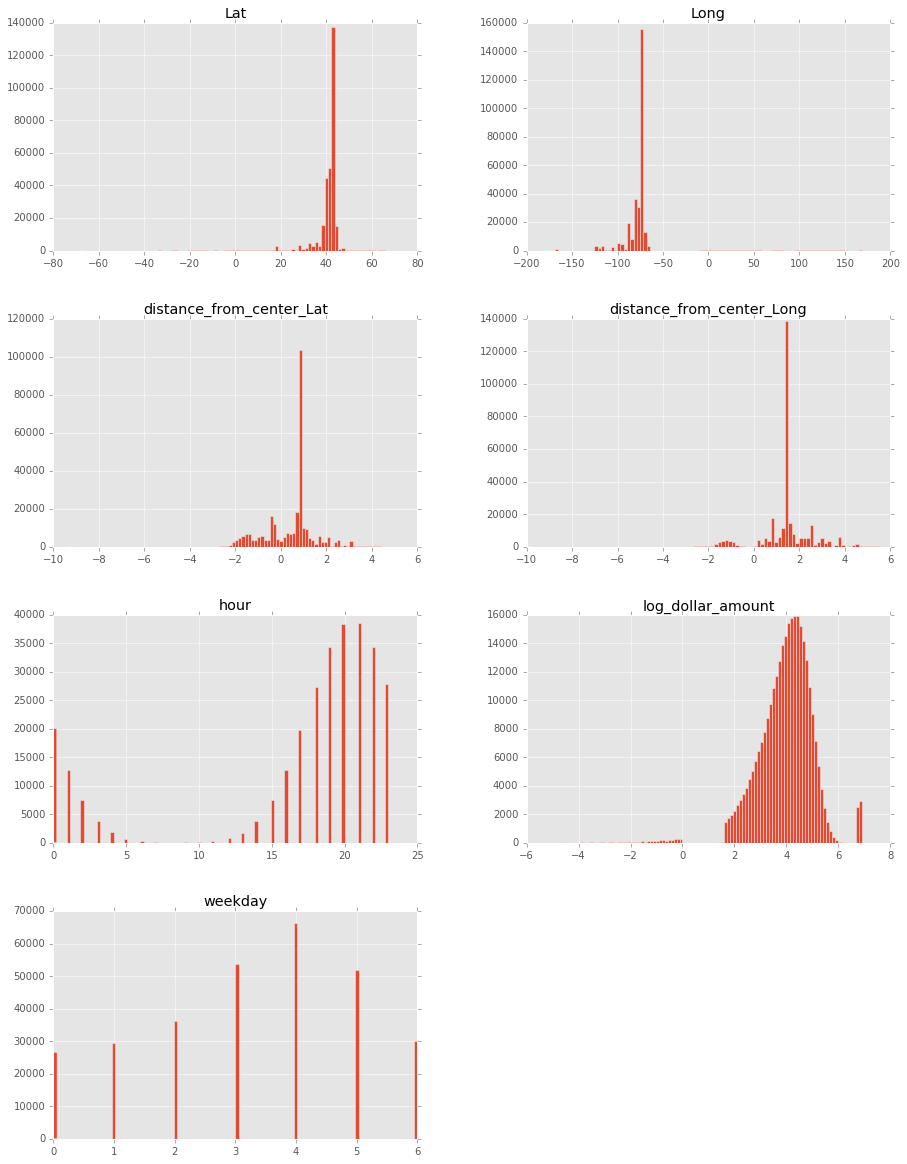

In [68]:
features = ['log_dollar_amount','Long','Lat','weekday','hour','distance_from_center_Lat','distance_from_center_Long']
transactions[features].hist(stacked=False, bins=100, figsize=(15,20), layout=(4,2))

In [70]:
transactions[['log_dollar_amount','distance_from_center_Lat','distance_from_center_Long']].describe()

,log_dollar_amount,distance_from_center_Lat,distance_from_center_Long
count,294588.000000,294588.000000,294588.000000
mean,3.959254,0.405573,1.436606
std,1.046308,1.090097,1.104434
min,-4.605170,-9.289617,-9.965524
25%,3.400197,-0.324046,1.351854
50%,4.068514,0.785421,1.417926
75%,4.609162,0.828401,1.633623
max,6.907725,4.691203,5.545774


In [79]:
transactions[transactions['log_dollar_amount'] > 6.9].shape, transactions.shape

((226, 15), (294588, 15))

In [80]:
transactions[transactions['log_dollar_amount'] > 6.9].head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,weekday,hour,log_dollar_amount,log_Lat,log_Long,distance_from_center_Lat,distance_from_center_Long
84,1003715054175576,2015-09-11 19:50:02,995.35,-80.126760,40.225626,2015,9,11,4,19,6.903094,3.694504,NaN,-0.339618,1.358800
2591,1126571863414211,2015-09-11 01:33:04,996.17,-80.168257,40.313138,2015,9,11,4,1,6.903918,3.696677,NaN,-0.470755,1.369407
3487,1128536627506856,2015-10-10 22:27:17,992.34,-89.050078,40.761166,2015,10,10,5,22,6.900066,3.707730,NaN,-1.734421,2.550604
6723,1175962294549313,2015-10-29 15:40:34,992.71,-71.112703,42.466777,2015,10,29,3,15,6.900439,3.748722,NaN,0.424685,1.633649
7865,1210872963953886,2015-09-29 04:28:42,995.86,-74.757468,40.058325,2015,9,29,1,4,6.903607,3.690337,NaN,-0.128579,0.390534


In [81]:
len(transactions[transactions['log_dollar_amount'] > 6.9].credit_card.unique()), len(transactions.credit_card.unique())

(193, 984)

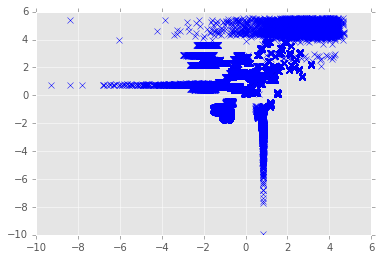

In [84]:
plt.plot(transactions['distance_from_center_Lat'],transactions['distance_from_center_Long'],"bx")

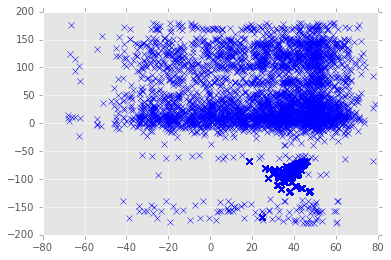

In [86]:
plt.plot(transactions['Lat'], transactions['Long'],"bx")

In [88]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [100]:
# Split train/test data
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(transactions, test_size=0.2, random_state=0)
X_train, X_cv = train_test_split(X, test_size=0.2, random_state=1)

In [102]:
transactions.shape, X_train.shape, X_test.shape, X_cv.shape

((294588, 15), (188536, 15), (58918, 15), (47134, 15))

In [169]:
features_to_use = ['log_dollar_amount']

In [201]:
transactions = transactions[transactions['log_dollar_amount']>0]

In [202]:
#train = X_train[features_to_use]
train = transactions[features_to_use]
cv = X_cv[features_to_use]
test = X_test[features_to_use]

mu, sigma = estimateGaussian(train)
p = multivariateGaussian(train,mu,sigma)

In [203]:
mu, sigma

(log_dollar_amount    4.0064
 dtype: float64, array([[ 0.86083379]]))

In [204]:
sigma.shape

(1, 1)

In [205]:
p

array([ 0.41727906,  0.34150731,  0.42617104, ...,  0.40135757,
        0.25069739,  0.23138401])

In [206]:
p.min(), p.max()

(0.0032364544880108706, 0.42998213569204197)

In [229]:
ep = 0.0033

In [230]:
outliers = np.asarray(np.where(p < ep))

In [231]:
outliers.shape

(1, 171)

In [232]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon

In [234]:
transactions.ix[outliers[0],:]

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,weekday,hour,log_dollar_amount,log_Lat,log_Long,distance_from_center_Lat,distance_from_center_Long
83,1.003715e+15,2015-09-28 19:52:53,32.23,-80.144435,40.279707,2015.0,9.0,28.0,0.0,19.0,3.472898,3.695848,NaN,-0.418609,1.363332
2567,1.126572e+15,2015-08-14 20:39:20,21.44,-80.262460,40.167137,2015.0,8.0,14.0,4.0,20.0,3.065258,3.693049,NaN,-0.260675,1.393077
7790,1.210873e+15,2015-09-17 22:47:14,41.86,-74.673598,40.044686,2015.0,9.0,17.0,3.0,22.0,3.734331,3.689996,NaN,-0.113188,0.445737
10454,1.261412e+15,2015-09-26 16:53:32,146.24,-77.453015,42.537788,2015.0,9.0,26.0,5.0,16.0,4.985249,3.750393,NaN,0.470079,0.197027
11868,1.301519e+15,2015-09-04 19:25:25,14.81,-76.028167,41.342973,2015.0,9.0,4.0,4.0,19.0,2.695303,3.721902,NaN,-0.903116,-1.574694
13580,1.368742e+15,2015-08-28 01:48:11,49.11,-73.938694,40.694148,2015.0,8.0,28.0,4.0,1.0,3.894063,3.706084,NaN,-1.412554,0.831406
13933,1.380554e+15,2015-10-29 23:15:38,72.66,-4.150248,27.941805,2015.0,10.0,29.0,3.0,23.0,4.285791,3.330124,NaN,2.564631,4.277846
14038,1.380554e+15,2015-08-06 22:00:48,23.39,-71.722114,42.437388,2015.0,8.0,6.0,3.0,22.0,3.152309,3.748030,NaN,0.405278,1.506990
14200,1.388344e+15,2015-08-07 18:57:41,39.56,-81.464195,38.197252,2015.0,8.0,7.0,4.0,18.0,3.677819,3.642764,NaN,1.008110,1.654212
15864,1.428403e+15,2015-10-21 19:48:42,25.79,-84.580560,39.179135,2015.0,10.0,21.0,2.0,19.0,3.249987,3.668144,NaN,0.564480,2.121701


In [236]:
transactions.ix[outliers[0],:].to_csv('potential_fraud_transactions.csv')

In [150]:
transactions[['log_dollar_amount','Lat','Long']].describe()

,log_dollar_amount,Lat,Long
count,294588.000000,294588.000000,294588.000000
mean,3.959254,40.937669,-76.235238
std,1.046308,5.391695,20.135015
min,-4.605170,-68.046553,-179.392887
25%,3.400197,40.487726,-80.209708
50%,4.068514,42.403066,-73.199737
75%,4.609162,43.180015,-72.091933
max,6.907725,78.914330,179.917513
